## Week 2

### Exercise:
Use and experience methods from previous lessons with given data. Try to search for other pandas methods to analyze the data such as `groupby()` and `read_csv()`.

In [245]:
# You can find covid related data under project's data folder 
base_url = "Datasets/"
infected_dataset_url = base_url + "time_series_covid19_confirmed_global.csv"
recovered_dataset_url = base_url + "time_series_covid19_recovered_global.csv"
deaths_dataset_url = base_url + "time_series_covid19_deaths_global.csv"

#### Solution:

In [246]:
# Your code goes here
import pandas as pd

In [247]:
infected_df = pd.read_csv(infected_dataset_url)
recovered_df = pd.read_csv(recovered_dataset_url)
deaths_df = pd.read_csv(deaths_dataset_url)

In [248]:
def data_summary(dataframe):
    print("-------------- INFO ----------------")
    print(dataframe.info())
    print("-------------- SHAPE ----------------")
    print(dataframe.shape)
    print("-------------- NULL ----------------")
    print(dataframe.isnull().sum())
    print("-------------- DESCRIBE ----------------")
    print(dataframe.describe([0.0, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99]).T)
    print("-------------- HEAD ----------------")
    print(dataframe.head())

In [249]:
data_summary(infected_df)

-------------- INFO ----------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Columns: 150 entries, Province/State to 6/15/20
dtypes: float64(2), int64(146), object(2)
memory usage: 311.8+ KB
None
-------------- SHAPE ----------------
(266, 150)
-------------- NULL ----------------
Province/State    185
Country/Region      0
Lat                 0
Long                0
1/22/20             0
                 ... 
6/11/20             0
6/12/20             0
6/13/20             0
6/14/20             0
6/15/20             0
Length: 150, dtype: int64
-------------- DESCRIBE ----------------
         count          mean            std       min        0%         25%  \
Lat      266.0     21.148043      24.909990  -51.7963  -51.7963    6.907750   
Long     266.0     22.538640      70.466256 -135.0000 -135.0000  -18.093125   
1/22/20  266.0      2.086466      27.279200    0.0000    0.0000    0.000000   
1/23/20  266.0      2.458647      27.377862    0.0000    0.00

In [250]:
data_summary(recovered_df)

-------------- INFO ----------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Columns: 150 entries, Province/State to 6/15/20
dtypes: float64(2), int64(146), object(2)
memory usage: 296.6+ KB
None
-------------- SHAPE ----------------
(253, 150)
-------------- NULL ----------------
Province/State    186
Country/Region      0
Lat                 0
Long                0
1/22/20             0
                 ... 
6/11/20             0
6/12/20             0
6/13/20             0
6/14/20             0
6/15/20             0
Length: 150, dtype: int64
-------------- DESCRIBE ----------------
         count          mean           std       min        0%       25%  \
Lat      253.0     19.801381     24.558602  -51.7963  -51.7963    6.4281   
Long     253.0     28.168223     67.091761 -106.3468 -106.3468   -7.6921   
1/22/20  253.0      0.110672      1.760345    0.0000    0.0000    0.0000   
1/23/20  253.0      0.118577      1.764332    0.0000    0.0000    0.0000 

In [251]:
data_summary(deaths_df)

-------------- INFO ----------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Columns: 150 entries, Province/State to 6/15/20
dtypes: float64(2), int64(146), object(2)
memory usage: 311.8+ KB
None
-------------- SHAPE ----------------
(266, 150)
-------------- NULL ----------------
Province/State    185
Country/Region      0
Lat                 0
Long                0
1/22/20             0
                 ... 
6/11/20             0
6/12/20             0
6/13/20             0
6/14/20             0
6/15/20             0
Length: 150, dtype: int64
-------------- DESCRIBE ----------------
         count         mean          std       min        0%        25%  \
Lat      266.0    21.148043    24.909990  -51.7963  -51.7963   6.907750   
Long     266.0    22.538640    70.466256 -135.0000 -135.0000 -18.093125   
1/22/20  266.0     0.063910     1.042337    0.0000    0.0000   0.000000   
1/23/20  266.0     0.067669     1.043908    0.0000    0.0000   0.000000   
1/

There are null values more than a half. We can drop the "Province/State" column.

In [252]:
infected_df.drop(["Province/State", "Lat", "Long"], axis = 1, inplace = True)
recovered_df.drop(["Province/State", "Lat", "Long"], axis = 1, inplace = True)
deaths_df.drop(["Province/State", "Lat", "Long"], axis = 1, inplace = True)

We can transform the date columns in one column. This will bw much better.

In [253]:
infected_df_new = pd.DataFrame()
recovered_df_new = pd.DataFrame()
deaths_df_new = pd.DataFrame()

In [254]:
for col in infected_df.iloc[:,1:]:
    df_baz = infected_df.iloc[:,:1]
    df_baz["Dates"] = col
    df_baz["Infected"] = infected_df[col]
    infected_df_new = pd.concat([infected_df_new, df_baz], ignore_index=True)

C:\Users\BETÜL DEMİRDAĞ\AppData\Local\Temp\ipykernel_19284\2170463866.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_baz["Dates"] = col
C:\Users\BETÜL DEMİRDAĞ\AppData\Local\Temp\ipykernel_19284\2170463866.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_baz["Infected"] = infected_df[col]
C:\Users\BETÜL DEMİRDAĞ\AppData\Local\Temp\ipykernel_19284\2170463866.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

C:\Users\BETÜL DEMİRDAĞ\AppData\Local\Temp\ipykernel_19284\2170463866.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_baz["Infected"] = infected_df[col]


In [255]:
print(infected_df_new.shape)
print(infected_df_new.head())

(38836, 3)
  Country/Region    Dates  Infected
0    Afghanistan  1/22/20         0
1        Albania  1/22/20         0
2        Algeria  1/22/20         0
3        Andorra  1/22/20         0
4         Angola  1/22/20         0


In [256]:
for col in recovered_df.iloc[:,1:]:
    df_baz = recovered_df.iloc[:,:1]
    df_baz["Dates"] = col
    df_baz["Recovered"] = recovered_df[col]
    recovered_df_new = pd.concat([recovered_df_new, df_baz], ignore_index=True)

C:\Users\BETÜL DEMİRDAĞ\AppData\Local\Temp\ipykernel_19284\4025415519.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_baz["Dates"] = col
C:\Users\BETÜL DEMİRDAĞ\AppData\Local\Temp\ipykernel_19284\4025415519.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_baz["Recovered"] = recovered_df[col]
C:\Users\BETÜL DEMİRDAĞ\AppData\Local\Temp\ipykernel_19284\4025415519.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

In [257]:
print(recovered_df_new.shape)
print(recovered_df_new.head())

(36938, 3)
  Country/Region    Dates  Recovered
0    Afghanistan  1/22/20          0
1        Albania  1/22/20          0
2        Algeria  1/22/20          0
3        Andorra  1/22/20          0
4         Angola  1/22/20          0


In [258]:
for col in deaths_df.iloc[:,1:]:
    df_baz = deaths_df.iloc[:,:1]
    df_baz["Dates"] = col
    df_baz["Deaths"] = deaths_df[col]
    deaths_df_new = pd.concat([deaths_df_new, df_baz], ignore_index=True)

C:\Users\BETÜL DEMİRDAĞ\AppData\Local\Temp\ipykernel_19284\16149865.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_baz["Dates"] = col
C:\Users\BETÜL DEMİRDAĞ\AppData\Local\Temp\ipykernel_19284\16149865.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_baz["Deaths"] = deaths_df[col]
C:\Users\BETÜL DEMİRDAĞ\AppData\Local\Temp\ipykernel_19284\16149865.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

C:\Users\BETÜL DEMİRDAĞ\AppData\Local\Temp\ipykernel_19284\16149865.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_baz["Dates"] = col
C:\Users\BETÜL DEMİRDAĞ\AppData\Local\Temp\ipykernel_19284\16149865.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_baz["Deaths"] = deaths_df[col]
C:\Users\BETÜL DEMİRDAĞ\AppData\Local\Temp\ipykernel_19284\16149865.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

In [259]:
print(deaths_df_new.shape)
print(deaths_df_new.head())

(38836, 3)
  Country/Region    Dates  Deaths
0    Afghanistan  1/22/20       0
1        Albania  1/22/20       0
2        Algeria  1/22/20       0
3        Andorra  1/22/20       0
4         Angola  1/22/20       0


We can concat the dataframes in one dataframes. Each data has common rows like "Country" and "Dates".

In [260]:
data_total = infected_df_new.merge(recovered_df_new, on = ["Country/Region", "Dates"])

In [261]:
data_total.head()

,Country/Region,Dates,Infected,Recovered
0,Afghanistan,1/22/20,0,0
1,Albania,1/22/20,0,0
2,Algeria,1/22/20,0,0
3,Andorra,1/22/20,0,0
4,Angola,1/22/20,0,0


In [262]:
data_total.shape

(237104, 4)

In [263]:
data_total_ = data_total.merge(deaths_df_new, on = ["Country/Region", "Dates"])

In [264]:
data_total_.shape

(5787440, 5)

In [265]:
data_total_.tail(10)

,Country/Region,Dates,Infected,Recovered,Deaths
5787430,Burundi,6/15/20,85,45,1
5787431,Sierra Leone,6/15/20,1176,683,51
5787432,Malawi,6/15/20,555,69,6
5787433,South Sudan,6/15/20,1693,49,27
5787434,Western Sahara,6/15/20,9,8,1
5787435,Sao Tome and Principe,6/15/20,662,177,12
5787436,Yemen,6/15/20,844,79,208
5787437,Comoros,6/15/20,176,114,2
5787438,Tajikistan,6/15/20,5097,3503,50
5787439,Lesotho,6/15/20,4,2,0


In [266]:
data_total_.isnull().sum()

Country/Region    0
Dates             0
Infected          0
Recovered         0
Deaths            0
dtype: int64

In [298]:
df = data_total_.groupby(["Country/Region", "Dates"])[["Infected", "Recovered", "Deaths"]].sum()
df = df.reset_index()
df.head()

,Country/Region,Dates,Infected,Recovered,Deaths
0,Afghanistan,1/22/20,0,0,0
1,Afghanistan,1/23/20,0,0,0
2,Afghanistan,1/24/20,0,0,0
3,Afghanistan,1/25/20,0,0,0
4,Afghanistan,1/26/20,0,0,0


In [304]:
df["Dates"] = pd.to_datetime(df["Dates"], dayfirst=True)

In [305]:
df.head()

,Country/Region,Dates,Infected,Recovered,Deaths
0,Afghanistan,2020-01-22,0,0,0
1,Afghanistan,2020-01-23,0,0,0
2,Afghanistan,2020-01-24,0,0,0
3,Afghanistan,2020-01-25,0,0,0
4,Afghanistan,2020-01-26,0,0,0


In [308]:
import matplotlib.pyplot as plt

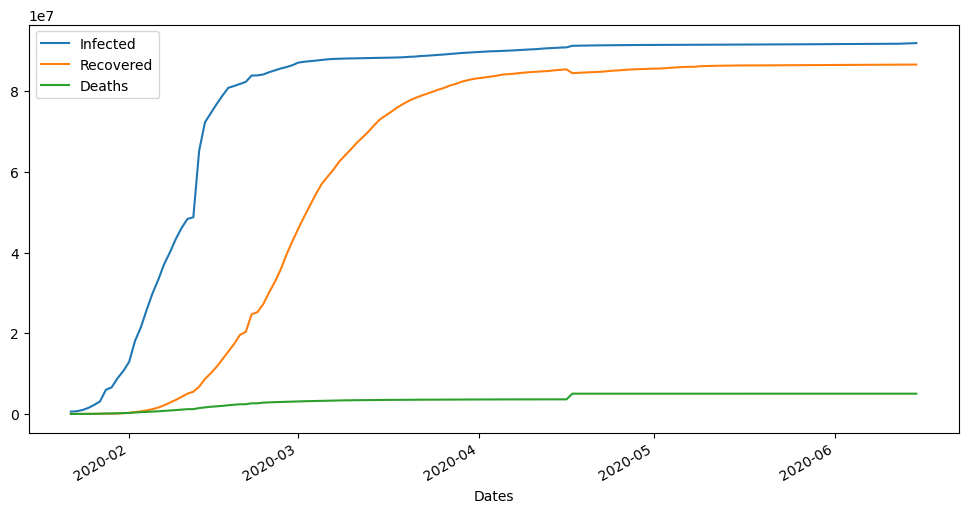

In [309]:
df.loc[df["Country/Region"] == "China"].plot(kind = "line", x = "Dates", figsize=(12,6))
plt.show()

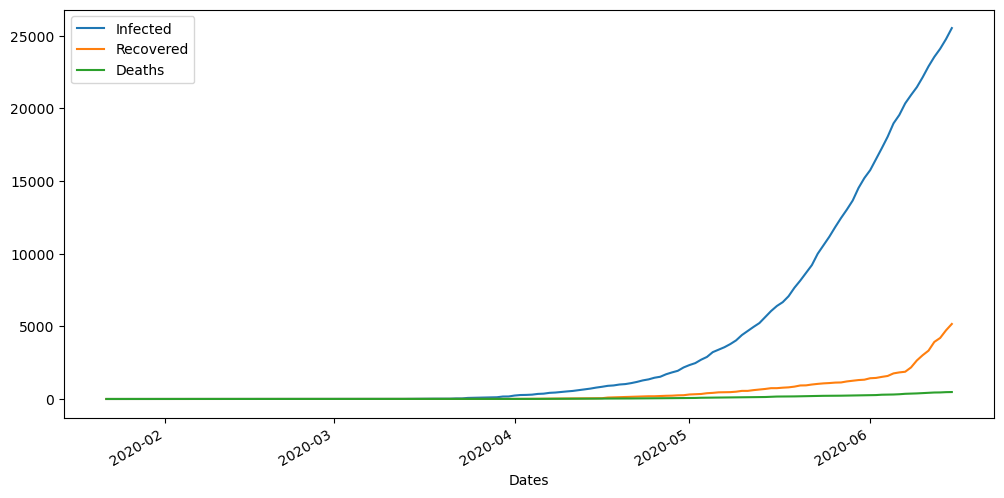

In [311]:
df.loc[df["Country/Region"] == "Afghanistan"].plot(kind = "line", x = "Dates", figsize=(12,6))
plt.show()